In [133]:
import pandas as pd
import numpy as np
from collections import defaultdict
# import matplotlib - very important
import matplotlib.pyplot as plt
# import the toolkit for plotting matplotlib 3D
from mpl_toolkits import mplot3d

#retrieving the data
weapons_data = pd.read_csv("DealsAndTIVs.csv", sep=';')

#verifying data
weapons_data.head(5)



0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
3534    United States
3535    United States
3536    United States
3537    United States
3538    United States
Name: Seller, Length: 3539, dtype: object

In [5]:
#number of entries
#3539 data entries according to this
len(weapons_data)

3539

In [6]:
#function to count number of instance of event in df
def get_value_counts(df, col_name):
    count_dict = defaultdict(int)
    def update_count_dict(r):
        count_dict[r[col_name]] += 1
    df.apply(lambda x: update_count_dict(x), axis=1)
    rows = [[e, count_dict[e]] for e in count_dict]
    return pd.DataFrame(rows, columns=[col_name, "Count"])

In [7]:
#df by country 
country_df = get_value_counts(weapons_data, "Buyer").sort_values(by="Count", ascending=False)
print(country_df)

             Buyer  Count
13           Japan    231
21    Saudi Arabia    223
39     South Korea    175
5        Australia    165
41             UAE    142
..             ...    ...
108         Rwanda      1
107           Togo      1
88       Mauritius      1
94   Syria rebels*      1
132        Ireland      1

[133 rows x 2 columns]


In [8]:
#df by Armament category
Armament_df = get_value_counts(weapons_data, "Armament category").sort_values(by="Count", ascending=False)
print(Armament_df)

     Armament category  Count
2             Missiles   1033
0             Aircraft    951
4              Engines    639
3    Armoured vehicles    360
1              Sensors    328
5        Naval weapons     85
8            Artillery     48
7                Ships     42
6  Air defence systems     40
9                Other     13


In [9]:
#df by order date
orderDate_df = get_value_counts(weapons_data, "Order date").sort_values(by="Count", ascending=False)
print(orderDate_df)

    Order date  Count
0         2014    300
13        2009    293
10        2008    277
8         2015    259
6         2011    233
2         2012    230
14        2010    222
7         2013    218
5         2016    217
1         2017    194
12        2007    193
3         2006    157
4         2018    128
21        2005    107
22        2002     80
9         2019     65
16        2003     58
24        2004     58
15        2000     52
11        2020     37
26        2001     27
19        1997     22
25        1998     21
17        1984     18
28        1999     16
23        1995     13
20        1996      9
30        1988      9
18        2021      7
27        1990      5
33        1987      5
31        1983      4
32        1994      3
29        1992      2


In [10]:
#df by delivery year
deliveryYear_df = get_value_counts(weapons_data, "Delivery year").sort_values(by="Delivery year", ascending=True)
print(deliveryYear_df)


    Delivery year  Count
12           2008    203
11           2009    210
13           2010    237
9            2011    262
8            2012    277
7            2013    262
6            2014    256
10           2015    302
0            2016    304
1            2017    266
5            2018    264
4            2019    238
3            2020    237
2            2021    221


In [11]:
#df delivery year by SRPRI
deliverySRPRI_df = weapons_data.groupby('Delivery year')['SIPRI estimate'].sum()
print(deliverySRPRI_df)

Delivery year
2008    1577.88
2009    1637.64
2010    2043.48
2011    2600.79
2012    3070.13
2013    2048.81
2014    2289.24
2015    2789.68
2016    2402.30
2017    2136.42
2018    1910.72
2019    2032.03
2020    1962.09
2021    2190.25
Name: SIPRI estimate, dtype: float64


In [12]:
#df delivery year by TIV
deliveryTIV_df = weapons_data.groupby('Delivery year')['TIV delivery values'].sum()
print(deliveryTIV_df)

Delivery year
2008     6804.3604
2009     6888.3300
2010     8073.7468
2011     8943.3658
2012     9053.3002
2013     7503.5650
2014     9602.0764
2015     9682.2080
2016     9864.3580
2017    11838.7410
2018     9824.3010
2019    10923.3000
2020     9232.8800
2021    10613.0860
Name: TIV delivery values, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

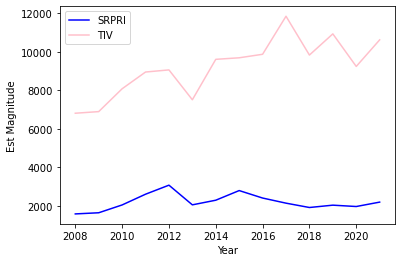

In [13]:
#visualizing size of deal by delivery year
#insights: TIV and SPRI follow a similar trend until after 2016; what's going on there
import matplotlib.pyplot as plt

years = deliveryYear_df["Delivery year"]
plt.plot(years, deliverySRPRI_df, color="blue", label="SRPRI")
plt.plot(years, deliveryTIV_df, color="pink", label="TIV")
plt.xlabel("Year")
plt.ylabel("Est Magnitude")
plt.legend()
plt.savefig("Sample Visualizations/SPRI-TIV.pdf", facecolor='white', transparent=False)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

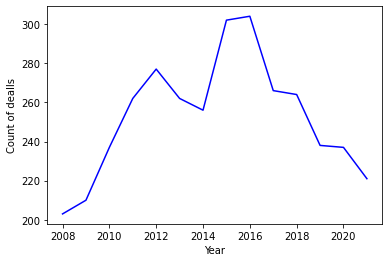

In [14]:
#visualizing count and delivery year 
plt.plot(years, deliveryYear_df["Count"], color="blue", label="Count")
plt.xlabel("Year")
plt.ylabel("Count of dealls")
plt.savefig("Sample Visualizations/Year-Count.pdf", facecolor='white', transparent=False)
plt.show

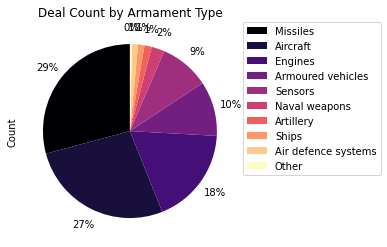

In [15]:
#armament pie by COUNT

my_fig, my_ax = plt.subplots()
plot = Armament_df['Count'].plot(kind = 'pie', 
                               labels = ["" for e in Armament_df["Armament category"]],
                               title = "Deal Count by Armament Type",
                               startangle=90,
                               autopct='%1.0f%%',
                               pctdistance=1.2,
                               ax = my_ax,
                               colormap = 'magma')
my_ax.legend(labels=Armament_df["Armament category"], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("Sample Visualizations/ArmamentCount.pdf", facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

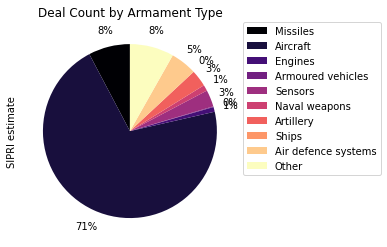

In [16]:
#armament pie by SRPRI
ArmamentSRPRI_df = weapons_data.groupby('Armament category', as_index=False)['SIPRI estimate'].sum()
#print(ArmamentSRPRI_df.head())

my_fig, my_ax = plt.subplots()
plot = ArmamentSRPRI_df['SIPRI estimate'].plot(kind = 'pie', 
                               labels = ["" for e in Armament_df["Armament category"]],
                               title = "Deal Count by Armament Type",
                               startangle=90,
                               autopct='%1.0f%%',
                               pctdistance=1.2,
                               ax = my_ax,
                               colormap = 'magma')
my_ax.legend(labels=Armament_df["Armament category"], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("Sample Visualizations/ArmamentSRPRI.pdf", facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

    Delivery year  SIPRI estimate
0            2008           55.63
1            2009           55.00
2            2010           55.00
3            2011           55.00
4            2012          110.00
5            2013           55.63
6            2014          220.63
7            2015          470.00
8            2016          415.63
9            2017          275.00
10           2018          220.00
11           2019          165.00
12           2020          110.00
13           2021          110.00


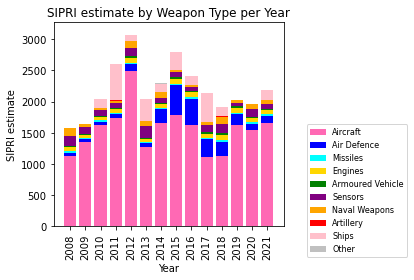

In [132]:
#Armament category over time - stacked bar
#data over time
#look at where the air defence is being shipped during 2014-2016; what caused the major spike?
#identify datapoints to use at cutoff points for the causal analysis

aircraft_df = weapons_data[weapons_data['Armament category'] == "Aircraft"]
aircraft_year_df = aircraft_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum().sort_values(by="Delivery year", ascending=True)

missiles_df = weapons_data[weapons_data['Armament category'] == "Missiles"]
missiles_year_df = missiles_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum().sort_values(by="Delivery year", ascending=True)

engines_df = weapons_data[weapons_data['Armament category'] == "Engines"]
engines_year_df = engines_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum().sort_values(by="Delivery year", ascending=True)

armouredV_df = weapons_data[weapons_data['Armament category'] == "Armoured vehicles"]
armouredV_year_df = armouredV_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum().sort_values(by="Delivery year", ascending=True)

sensors_df = weapons_data[weapons_data['Armament category'] == "Sensors"]
sensors_year_df = sensors_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum().sort_values(by="Delivery year", ascending=True)

naval_df = weapons_data[weapons_data['Armament category'] == "Naval weapons"]
naval_year_df = naval_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum().sort_values(by="Delivery year", ascending=True)

artillery_df = weapons_data[weapons_data['Armament category'] == "Artillery"]
artillery_year_df = artillery_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum().sort_values(by="Delivery year", ascending=True)

ships_df = weapons_data[weapons_data['Armament category'] == "Ships"]
ships_year_df = ships_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum()
row2008 = {'Delivery year':2008, 'SIPRI estimate':0}
row2009= {'Delivery year':2009, 'SIPRI estimate':0}
ships_year_df = ships_year_df.append([row2008, row2009], ignore_index=True).sort_values(by="Delivery year", ascending=True)

airdefence_df = weapons_data[weapons_data['Armament category'] == "Air defence systems"]
airdefence_year_df = airdefence_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum().sort_values(by="Delivery year", ascending=True)

other_df = weapons_data[weapons_data['Armament category'] == "Other"]
other_year_df = other_df.groupby('Delivery year', as_index=False)['SIPRI estimate'].sum().sort_values(by="Delivery year", ascending=True)

row2010 = {'Delivery year':2010, 'SIPRI estimate':0}
row2016 = {'Delivery year':2016, 'SIPRI estimate':0}
row2017 = {'Delivery year':2017, 'SIPRI estimate':0}
row2018 = {'Delivery year':2018, 'SIPRI estimate':0}
row2019 = {'Delivery year':2019, 'SIPRI estimate':0}
row2020 = {'Delivery year':2020, 'SIPRI estimate':0}
row2021 = {'Delivery year':2021, 'SIPRI estimate':0}

other_year_df = other_year_df.append([row2010, row2016, row2017, row2018, row2019,row2020,row2021], ignore_index=True).sort_values(by="Delivery year", ascending=True)

years = aircraft_year_df["Delivery year"]

print(airdefence_year_df)

plt.bar(years, aircraft_year_df["SIPRI estimate"], color='hotpink')
plt.bar(years, airdefence_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"], color='blue')
plt.bar(years, missiles_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"]+airdefence_year_df["SIPRI estimate"], color='aqua')
plt.bar(years, engines_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"]+airdefence_year_df["SIPRI estimate"]+missiles_year_df["SIPRI estimate"], color='gold')
plt.bar(years, armouredV_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"]+airdefence_year_df["SIPRI estimate"]+missiles_year_df["SIPRI estimate"]+engines_year_df["SIPRI estimate"], color='green')
plt.bar(years, sensors_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"]+airdefence_year_df["SIPRI estimate"]+missiles_year_df["SIPRI estimate"]+engines_year_df["SIPRI estimate"]+armouredV_year_df["SIPRI estimate"], color='purple')
plt.bar(years, naval_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"]+airdefence_year_df["SIPRI estimate"]+missiles_year_df["SIPRI estimate"]+engines_year_df["SIPRI estimate"]+armouredV_year_df["SIPRI estimate"]+sensors_year_df["SIPRI estimate"], color='orange')
plt.bar(years, artillery_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"]+airdefence_year_df["SIPRI estimate"]+missiles_year_df["SIPRI estimate"]+engines_year_df["SIPRI estimate"]+armouredV_year_df["SIPRI estimate"]+sensors_year_df["SIPRI estimate"]+naval_year_df["SIPRI estimate"], color='red')
plt.bar(years, ships_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"]+airdefence_year_df["SIPRI estimate"]+missiles_year_df["SIPRI estimate"]+engines_year_df["SIPRI estimate"]+armouredV_year_df["SIPRI estimate"]+sensors_year_df["SIPRI estimate"]+naval_year_df["SIPRI estimate"]+artillery_year_df["SIPRI estimate"], color='pink')
plt.bar(years, other_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"]+airdefence_year_df["SIPRI estimate"]+missiles_year_df["SIPRI estimate"]+engines_year_df["SIPRI estimate"]+armouredV_year_df["SIPRI estimate"]+sensors_year_df["SIPRI estimate"]+naval_year_df["SIPRI estimate"]+artillery_year_df["SIPRI estimate"]+ships_year_df["SIPRI estimate"], color='silver')
#plt.bar(years, airdefence_year_df["SIPRI estimate"], bottom = aircraft_year_df["SIPRI estimate"]+missiles_year_df["SIPRI estimate"]+engines_year_df["SIPRI estimate"]+armouredV_year_df["SIPRI estimate"]+sensors_year_df["SIPRI estimate"]+naval_year_df["SIPRI estimate"]+artillery_year_df["SIPRI estimate"]+ships_year_df["SIPRI estimate"]+other_year_df["SIPRI estimate"], color='blue')



plt.xlabel("Year")
plt.ylabel("SIPRI estimate")
plt.xticks(years, rotation=90)
plt.legend(["Aircraft", "Air Defence", "Missiles", "Engines", "Armoured Vehicle", "Sensors", "Naval Weapons", "Artillery", "Ships", "Other"], 
               bbox_to_anchor=(1.1, .5), 
               loc='upper left', 
                prop={'size': 8}, 
                borderaxespad=0)
plt.title("SIPRI estimate by Weapon Type per Year")
plt.tight_layout()
plt.savefig("Sample Visualizations/ArmamentYearSRPRI.pdf", facecolor='white', transparent=False, bbox_inches='tight')
plt.show()
plt.show() 